### TRABAJO PRÁCTICO - ENTREGA FINAL ###
### ZOMACO ###

No me tomaba el dataset, y tue que corregir el código. Por eso al final dice encoding=----

In [6]:
import pandas as pd

# Cargar el dataset con la codificación correcta
df = pd.read_csv('C:/GitHub/DataScienceI/Trabajo práctico Data Science I/zomato.csv', encoding='ISO-8859-1')

# Mostrar las primeras filas del dataset
print(df.head())

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

Ahora sí...
## Objetivo del Trabajo Práctico ##
### CONTEXTO ###
El contexto del trabajo práctico se centra en el análisis exhaustivo del mercado de restaurantes utilizando el dataset de Zomato. Con el auge de la industria de la restauración y la competencia creciente, es crucial tomar decisiones estratégicas basadas en datos para asegurar el éxito de un nuevo restaurante.

### PROBLEMA ###
Determinar las mejores estrategias para abrir un nuevo restaurante, considerando factores como ubicación, tipo de cocina, rango de precios, servicios ofrecidos y expectativas de los clientes. La meta es identificar las características más influyentes que podrían predecir el éxito de un restaurante, basándonos en datos históricos de Zomato.

### Objetivos ###

- Análisis Exploratorio de Datos (EDA): Explorar y visualizar los datos para entender mejor las características y el comportamiento del mercado de restaurantes.

- Selección de Características (Feature Selection): Utilizar métodos estadísticos para identificar las características más relevantes que influyen en la calificación de los restaurantes.

- Construcción de Modelos Predictivos: Entrenar y evaluar modelos de clasificación para predecir la calificación de los restaurantes.

- Validación del Modelo: Calcular métricas básicas para validar la precisión y efectividad del modelo.

- Recomendaciones: Proporcionar recomendaciones basadas en los resultados obtenidos para la apertura de un nuevo restaurante, considerando factores clave como ubicación, tipo de cocina, servicios y precios.

Vamos a verificar si hay datos nulos (los eliminamos) y/o duplicados

In [7]:
# Verificar valores nulos
print(df.isnull().sum())

# Eliminar filas con valores nulos
df = df.dropna()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [8]:
# Verificar duplicados
print(df.duplicated().sum())

0


Vamos a verificar los tipos de datos de cada columna

In [9]:
# Verificar tipos de datos
print(df.dtypes)

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object


In [10]:
# Convertir columnas a booleanas
df['Has Table booking'] = df['Has Table booking'].map({'Yes': True, 'No': False})
df['Has Online delivery'] = df['Has Online delivery'].map({'Yes': True, 'No': False})
df['Is delivering now'] = df['Is delivering now'].map({'Yes': True, 'No': False})
df['Switch to order menu'] = df['Switch to order menu'].map({'Yes': True, 'No': False})

Vamos a crear un gráfico tipo mapa de barras que muestre el promedio de valoración de los restaurantes en cada ciudad

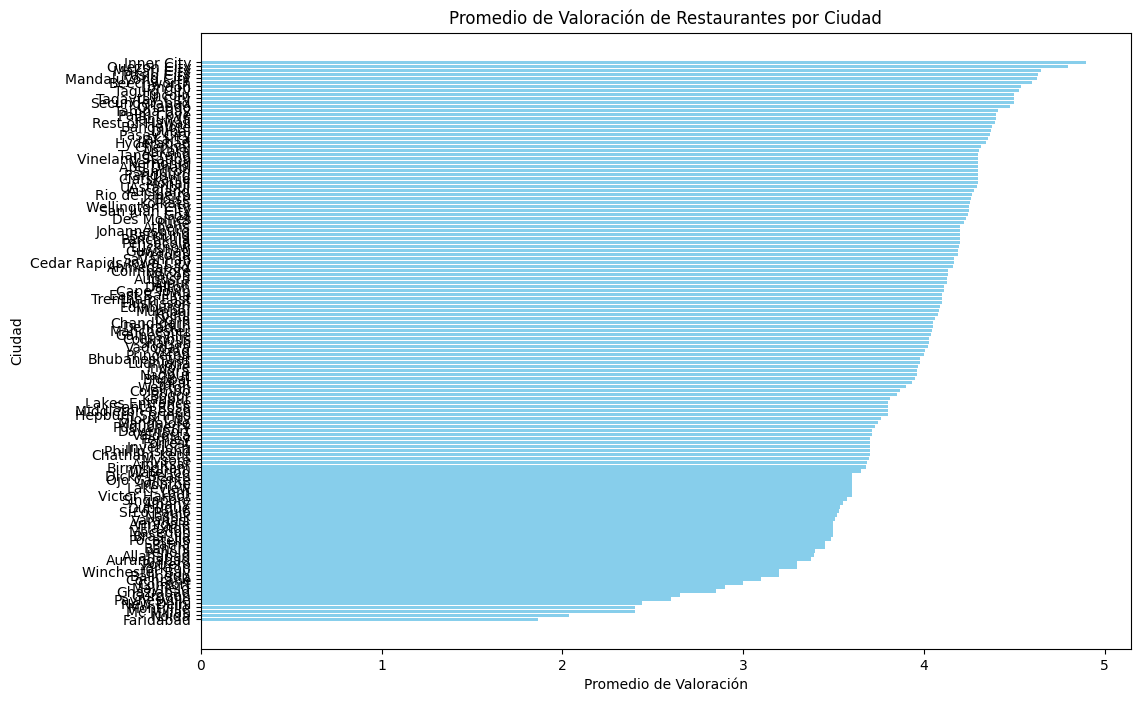

In [11]:
import matplotlib.pyplot as plt

# Agrupar por ciudad y calcular el promedio de valoración
city_ratings = df.groupby('City')['Aggregate rating'].mean().reset_index()

# Ordenar las ciudades por promedio de valoración
city_ratings = city_ratings.sort_values(by='Aggregate rating', ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
plt.barh(city_ratings['City'], city_ratings['Aggregate rating'], color='skyblue')
plt.xlabel('Promedio de Valoración')
plt.ylabel('Ciudad')
plt.title('Promedio de Valoración de Restaurantes por Ciudad')
plt.gca().invert_yaxis()  # Invertir el eje y para que la ciudad con mayor valoración esté arriba
plt.show()

Como el gráfico tiene muchas ciudades, vamos a hacer dos gráficos, uno por país, y otro con el top 20 de las ciudades con mejores promedios de valoraciones

In [14]:
# Crear un diccionario para mapear los códigos de país a nombres de países
country_dict = {
    1: 'India',
    14: 'Australia',
    30: 'Brazil',
    37: 'Canada',
    94: 'Indonesia',
    148: 'New Zealand',
    162: 'Philippines',
    166: 'Qatar',
    184: 'Singapore',
    189: 'South Africa',
    191: 'Sri Lanka',
    208: 'Turkey',
    214: 'United Arab Emirates',
    215: 'United Kingdom',
    216: 'United States'
}

# Agregar una columna de país al DataFrame
df['Country'] = df['Country Code'].map(country_dict)

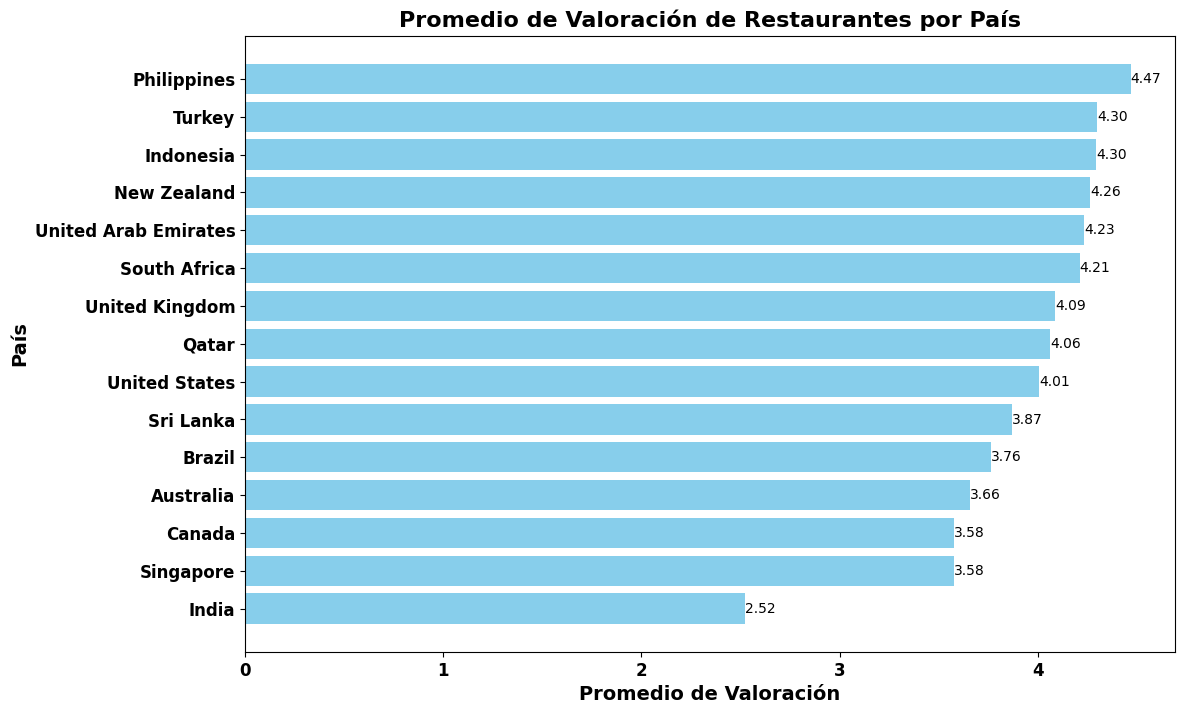

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Agrupar por país y calcular el promedio de valoración
country_ratings = df.groupby('Country')['Aggregate rating'].mean().reset_index()

# Ordenar los países por promedio de valoración
country_ratings = country_ratings.sort_values(by='Aggregate rating', ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
bars = plt.barh(country_ratings['Country'], country_ratings['Aggregate rating'], color='skyblue')

# Añadir los valores en cada barra
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}', 
             va='center', ha='left', fontsize=10, color='black')

# Personalizar los ejes
plt.xlabel('Promedio de Valoración', fontsize=14, fontweight='bold')
plt.ylabel('País', fontsize=14, fontweight='bold')
plt.title('Promedio de Valoración de Restaurantes por País', fontsize=16, fontweight='bold')
plt.gca().invert_yaxis()  # Invertir el eje y para que el país con mayor valoración esté arriba
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

plt.show()

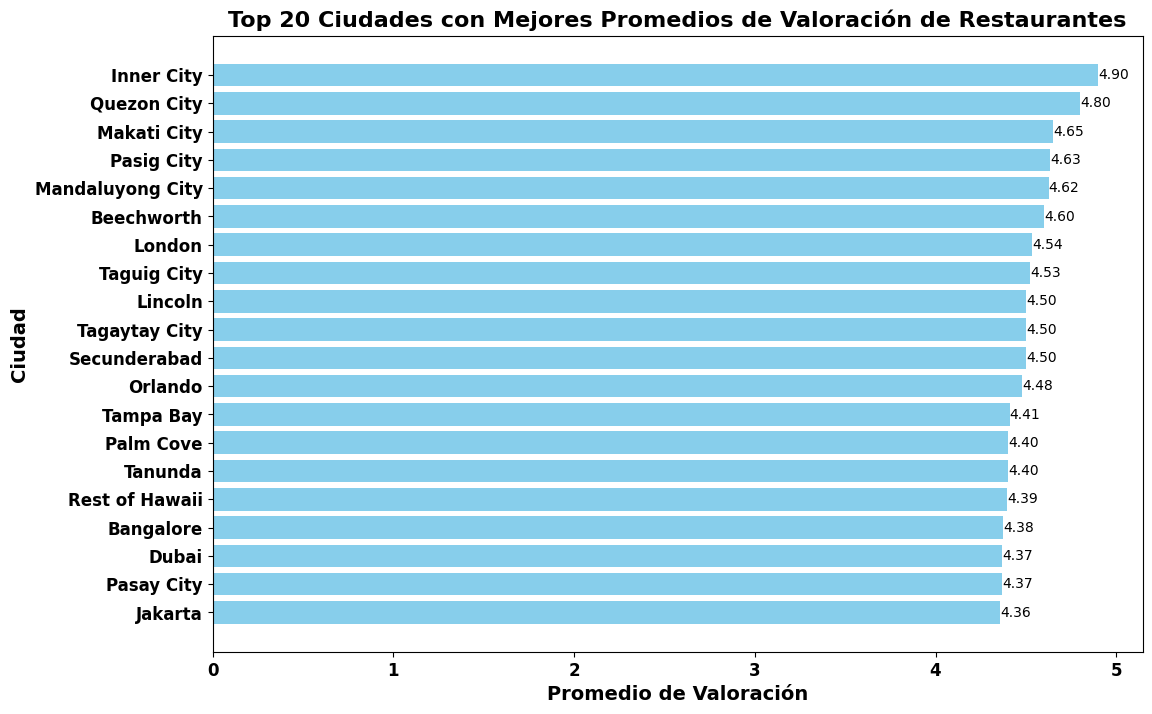

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Agrupar por ciudad y calcular el promedio de valoración
city_ratings = df.groupby('City')['Aggregate rating'].mean().reset_index()

# Ordenar las ciudades por promedio de valoración y seleccionar las top 20
top_20_cities = city_ratings.sort_values(by='Aggregate rating', ascending=False).head(20)

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
bars = plt.barh(top_20_cities['City'], top_20_cities['Aggregate rating'], color='skyblue')

# Añadir los valores en cada barra
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}', 
             va='center', ha='left', fontsize=10, color='black')

# Personalizar los ejes
plt.xlabel('Promedio de Valoración', fontsize=14, fontweight='bold')
plt.ylabel('Ciudad', fontsize=14, fontweight='bold')
plt.title('Top 20 Ciudades con Mejores Promedios de Valoración de Restaurantes', fontsize=16, fontweight='bold')
plt.gca().invert_yaxis()  # Invertir el eje y para que la ciudad con mayor valoración esté arriba
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

plt.show()

Ahora lo que quiero ver son los mismos gráficos, pero analizando la variable de precios por país y en las 20 ciudades con mejor valoración.
El problema que tengo es que la moneda del dataset es la moneda local de cada país, por lo que primero vamos a llevar todos los precios a USD estadounidense.

In [17]:
import pandas as pd

In [18]:
df = pd.read_csv('C:/GitHub/DataScienceI/Trabajo práctico Data Science I/zomato.csv', encoding='ISO-8859-1')

In [19]:
# Crear un diccionario con los tipos de cambio (ejemplo)
exchange_rates = {
    'INR': 0.012,  # Rupia india a USD
    'AUD': 0.64,   # Dólar australiano a USD
    'BRL': 0.20,   # Real brasileño a USD
    'CAD': 0.74,   # Dólar canadiense a USD
    'IDR': 0.000067, # Rupia indonesia a USD
    'NZD': 0.59,   # Dólar neozelandés a USD
    'PHP': 0.018,  # Peso filipino a USD
    'QAR': 0.27,   # Rial catarí a USD
    'SGD': 0.73,   # Dólar singapurense a USD
    'ZAR': 0.053,  # Rand sudafricano a USD
    'LKR': 0.0031, # Rupia de Sri Lanka a USD
    'TRY': 0.037,  # Lira turca a USD
    'AED': 0.27,   # Dirham de los EAU a USD
    'GBP': 1.25,   # Libra esterlina a USD
    'USD': 1.00    # Dólar estadounidense a USD
}

In [20]:
# Crear un diccionario para mapear los códigos de país a monedas
country_to_currency = {
    1: 'INR',
    14: 'AUD',
    30: 'BRL',
    37: 'CAD',
    94: 'IDR',
    148: 'NZD',
    162: 'PHP',
    166: 'QAR',
    184: 'SGD',
    189: 'ZAR',
    191: 'LKR',
    208: 'TRY',
    214: 'AED',
    215: 'GBP',
    216: 'USD'
}

# Agregar una columna de moneda al DataFrame
df['Currency'] = df['Country Code'].map(country_to_currency)

In [124]:
# Convertir los precios a USD
df['Price in USD'] = df.apply(lambda row: row['Average Cost for two'] * exchange_rates[row['Currency']], axis=1)

In [22]:
# Visualizar las primeras filas del DataFrame resultante
print(df[['City', 'Currency', 'Average Cost for two', 'Price in USD']].head())

               City Currency  Average Cost for two  Price in USD
0       Makati City      PHP                  1100          19.8
1       Makati City      PHP                  1200          21.6
2  Mandaluyong City      PHP                  4000          72.0
3  Mandaluyong City      PHP                  1500          27.0
4  Mandaluyong City      PHP                  1500          27.0


Vamos crear un gráfico de columnas (histograma), en donde en el eje vertical tenga la valoración de las mejores 20 ciudades con los mejores restaurantes, y en el eje horizontal los precios en usd. 

In [23]:
# Agrupar por ciudad y calcular el promedio de valoración y precio en USD
city_ratings_prices = df.groupby('City').agg({'Aggregate rating': 'mean', 'Price in USD': 'mean'}).reset_index()

In [24]:
# Seleccionar las 20 ciudades con mejores valoraciones
top_20_cities2 = city_ratings_prices.nlargest(20, 'Aggregate rating')

In [25]:
# Calcular el precio promedio en USD de las 20 ciudades
average_price_usd = top_20_cities2['Price in USD'].mean()

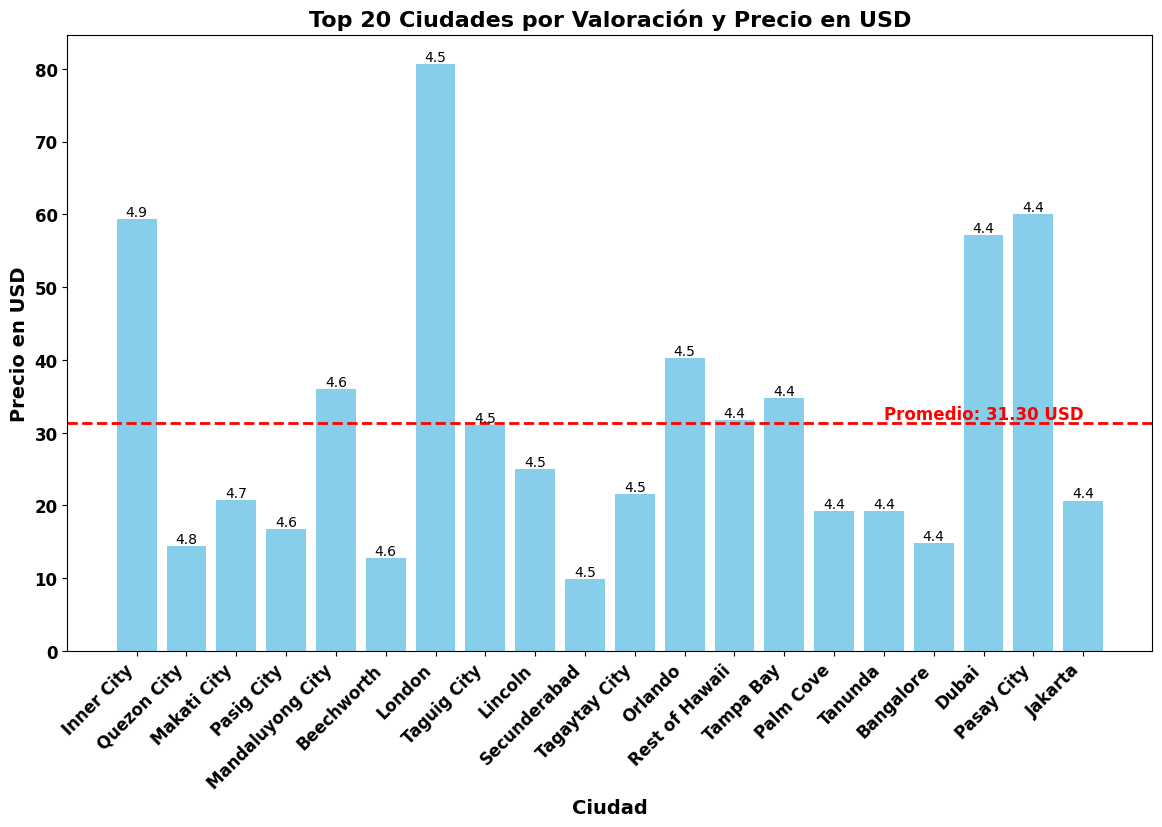

In [26]:
import matplotlib.pyplot as plt

# Crear el gráfico de columnas
plt.figure(figsize=(14, 8))
bars = plt.bar(top_20_cities2['City'], top_20_cities2['Price in USD'], color='skyblue')

# Añadir las valoraciones en cada barra
for bar, rating in zip(bars, top_20_cities2['Aggregate rating']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{rating:.1f}', 
             ha='center', va='bottom', fontsize=10, color='black')
    
# Agregar la línea punteada para el precio promedio
plt.axhline(y=average_price_usd, color='r', linestyle='--', linewidth=2)
plt.text(len(top_20_cities2) - 1, average_price_usd, f'Promedio: {average_price_usd:.2f} USD', 
         ha='right', va='bottom', fontsize=12, color='red', fontweight='bold')
    
# Personalizar los ejes
plt.ylabel('Precio en USD', fontsize=14, fontweight='bold')
plt.xlabel('Ciudad', fontsize=14, fontweight='bold')
plt.title('Top 20 Ciudades por Valoración y Precio en USD', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

plt.show()

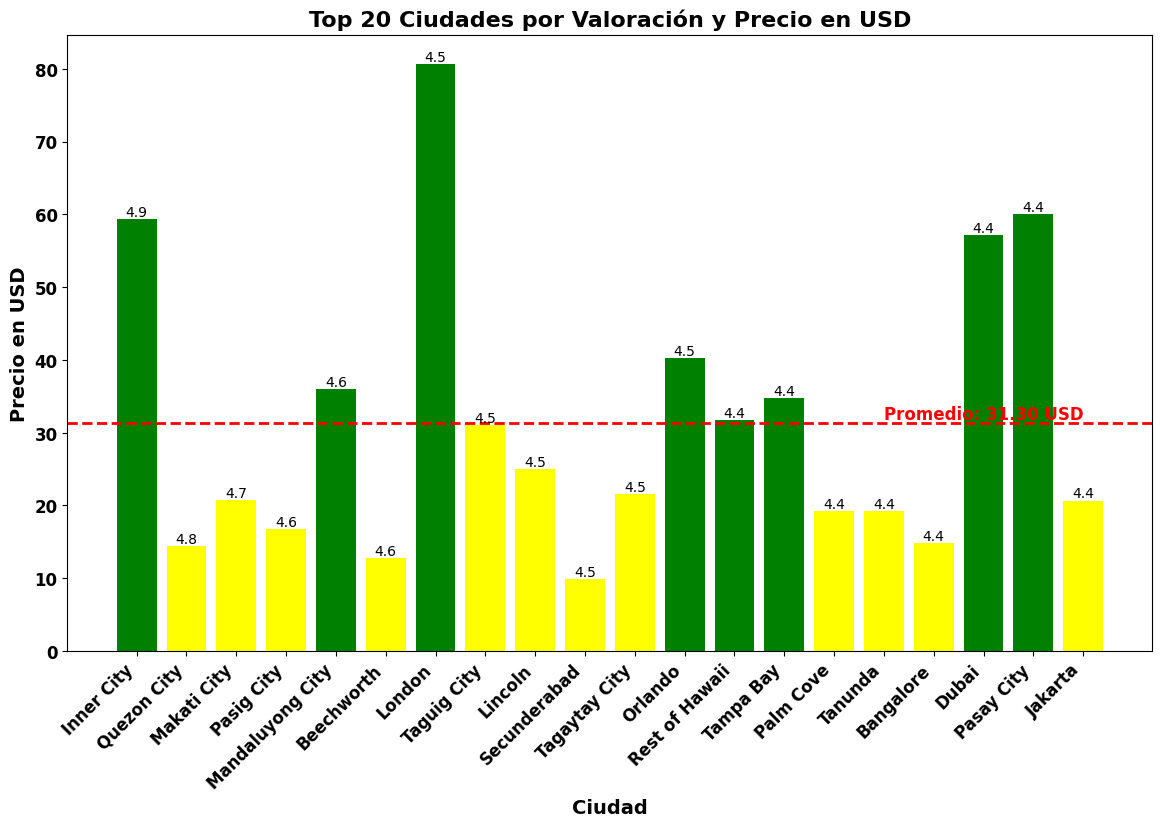

In [27]:
# A este gráfico de arriba, le voy a agregar parámetros para que las columnas que estén por encima del promedio me las pinte en verde, y las que estén por debajo en amarillo

import matplotlib.pyplot as plt

# Crear el gráfico de columnas
plt.figure(figsize=(14, 8))

# Definir los colores según el promedio
colors = ['green' if price > average_price_usd else 'yellow' for price in top_20_cities2['Price in USD']]

bars = plt.bar(top_20_cities2['City'], top_20_cities2['Price in USD'], color=colors)

# Añadir las valoraciones en cada barra
for bar, rating in zip(bars, top_20_cities2['Aggregate rating']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{rating:.1f}', 
             ha='center', va='bottom', fontsize=10, color='black')
    
# Agregar la línea punteada para el precio promedio
plt.axhline(y=average_price_usd, color='r', linestyle='--', linewidth=2)
plt.text(len(top_20_cities2) - 1, average_price_usd, f'Promedio: {average_price_usd:.2f} USD', 
         ha='right', va='bottom', fontsize=12, color='red', fontweight='bold')

# Personalizar los ejes
plt.ylabel('Precio en USD', fontsize=14, fontweight='bold')
plt.xlabel('Ciudad', fontsize=14, fontweight='bold')
plt.title('Top 20 Ciudades por Valoración y Precio en USD', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

plt.show()

Vamos con los gráficos Seaborn. Quiero analizar la relación entre la valoración agregada (Aggregate rating) y el precio en USD (Price in USD).

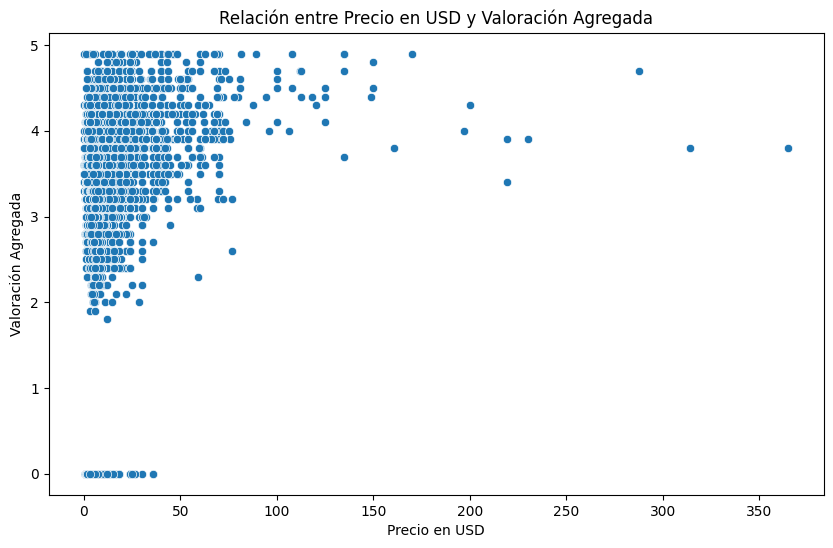

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Price in USD', y='Aggregate rating')
plt.title('Relación entre Precio en USD y Valoración Agregada')
plt.xlabel('Precio en USD')
plt.ylabel('Valoración Agregada')
plt.show()

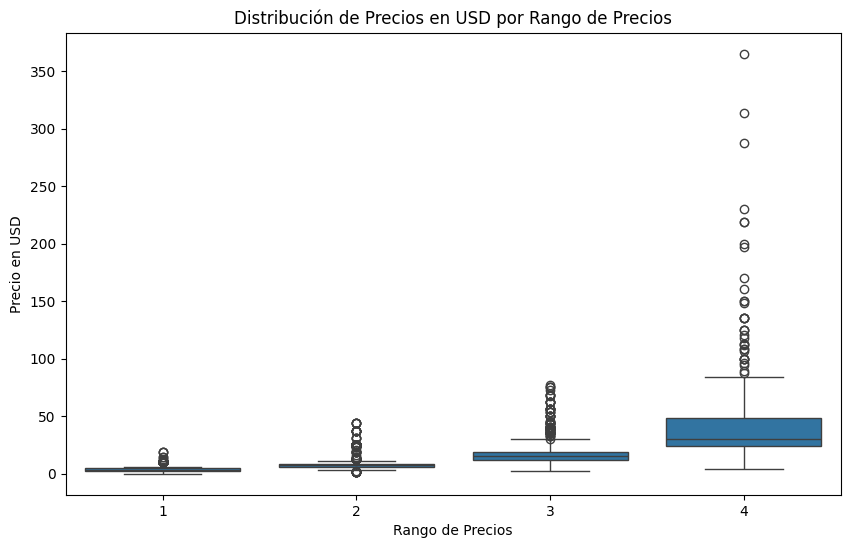

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Price range', y='Price in USD')
plt.title('Distribución de Precios en USD por Rango de Precios')
plt.xlabel('Rango de Precios')
plt.ylabel('Precio en USD')
plt.show()

In [30]:
#Quiero conocer los rangos de precios, del más barato al más caro

# Precio más barato
min_price = df['Price in USD'].min()

# Precio más caro
max_price = df['Price in USD'].max()

print(f"Precio más barato: ${min_price:.2f}")
print(f"Precio más caro: ${max_price:.2f}")


Precio más barato: $0.00
Precio más caro: $365.00


Como veo que hay restaurantes con precio $0.00, quiero eliminarlos porque quiere decir que no hay datos

In [31]:
# Identificar los restaurantes con precio 0 USD
restaurantes_precio_cero = df[df['Price in USD'] == 0]

print("Restaurantes con precio 0 USD:")
print(restaurantes_precio_cero[['Restaurant Name', 'Price in USD']])

Restaurantes con precio 0 USD:
                     Restaurant Name  Price in USD
84                     Cookie Shoppe           0.0
85     El Vaquero Mexican Restaurant           0.0
87    Pearly's Famous Country Cookng           0.0
201                         Deorio's           0.0
240                           Azteca           0.0
277    Happy Joe's Pizza & Ice Cream           0.0
346             HI Lite Bar & Lounge           0.0
397                      Royal Hotel           0.0
407                    Senor Iguanas           0.0
634      The Latitude - Radisson Blu           0.0
637                  Sheroes Hangout           0.0
639                   Chapter 1 Cafe           0.0
677                   The BrewMaster           0.0
851             BMG - All Day Dining           0.0
2364   Atmosphere Grill Cafe Sheesha           0.0
2368                      UrbanCrave           0.0
9242              Deena Chat Bhandar           0.0
9254                 VNS Live Studio           0.0


In [32]:
# Eliminar los restaurantes con precio 0 USD
df = df[df['Price in USD'] != 0]

# Verificar que se han eliminado
print("Restaurantes restantes después de eliminar los de precio 0 USD:")
print(df[['Restaurant Name', 'Price in USD']].head())

Restaurantes restantes después de eliminar los de precio 0 USD:
          Restaurant Name  Price in USD
0        Le Petit Souffle          19.8
1        Izakaya Kikufuji          21.6
2  Heat - Edsa Shangri-La          72.0
3                    Ooma          27.0
4             Sambo Kojin          27.0


In [33]:
#Quiero conocer los rangos de precios, del más barato al más caro

# Precio más barato
min_price = df['Price in USD'].min()

# Precio más caro
max_price = df['Price in USD'].max()

print(min_price)
print(max_price)

0.6
365.0


Sigo viendo que hay precios muy baratos. Voy a sacar los que el precio promedio en USD sea menor a 15USD

In [34]:
# Eliminar los restaurantes con precio menor a 15 USD
df = df[df['Price in USD'] >= 15]

In [35]:
# Verificar que se han eliminado
print("Restaurantes restantes después de eliminar los de precio menor a 15 USD:")
print(df[['Restaurant Name', 'Price in USD']].head())

Restaurantes restantes después de eliminar los de precio menor a 15 USD:
          Restaurant Name  Price in USD
0        Le Petit Souffle          19.8
1        Izakaya Kikufuji          21.6
2  Heat - Edsa Shangri-La          72.0
3                    Ooma          27.0
4             Sambo Kojin          27.0


In [36]:
# Encontrar el precio más bajo y el más alto
min_price = df['Price in USD'].min()
max_price = df['Price in USD'].max()

print(f"Precio más bajo: ${min_price:.2f}")
print(f"Precio más alto: ${max_price:.2f}")

Precio más bajo: $15.00
Precio más alto: $365.00


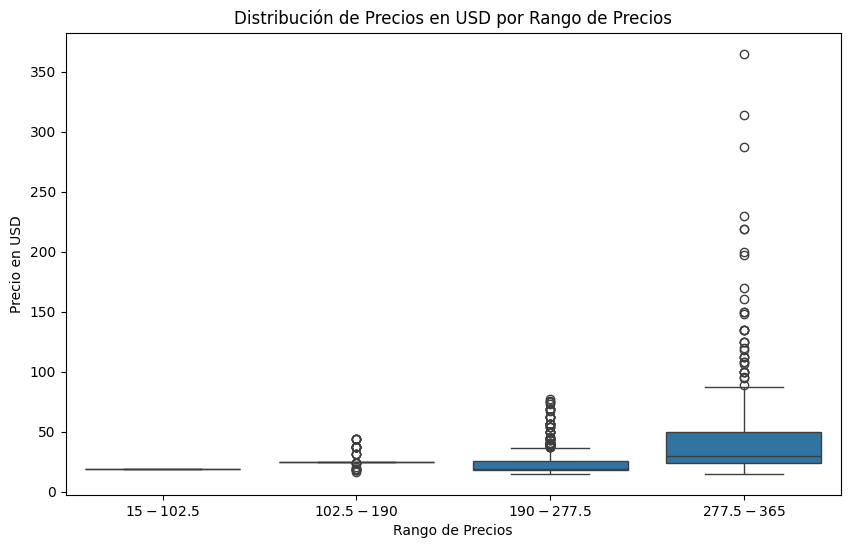

In [37]:
# Ahora quiero hacer el mismo gráfico de antes, pero ahora quiero que se vean los precios en cada rango

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Price range', y='Price in USD')
plt.xticks(ticks=[0, 1, 2, 3], labels=['$15 - $102.5', '$102.5 - $190', '$190 - $277.5', '$277.5 - $365'])
plt.title('Distribución de Precios en USD por Rango de Precios')
plt.xlabel('Rango de Precios')
plt.ylabel('Precio en USD')
plt.show()

In [38]:
# Quiero saber la cantidad de restaurantes que hay en cada rango, y luego colocarlas en el gráfico

# Definir los rangos de precios
bins = [15, 102.5, 190, 277.5, 365]
labels = ['Rango 1', 'Rango 2', 'Rango 3', 'Rango 4']

# Crear una nueva columna para los rangos de precios
df['Price range'] = pd.cut(df['Price in USD'], bins=bins, labels=labels, include_lowest=True)

# Contar la cantidad de restaurantes en cada rango
counts = df['Price range'].value_counts().sort_index()

print(counts)

Price range
Rango 1    1497
Rango 2      20
Rango 3       5
Rango 4       3
Name: count, dtype: int64


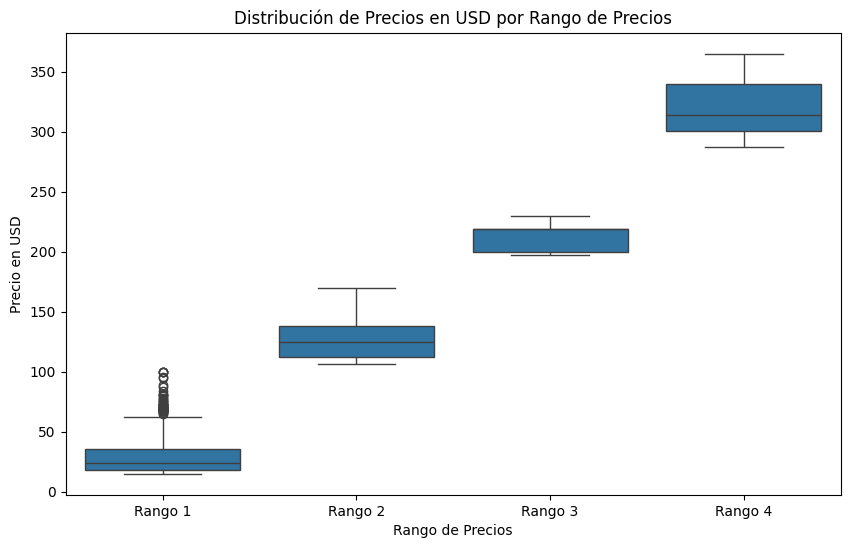

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Price range', y='Price in USD')
labels_with_counts = [f'$15 - $102.5\n(n={counts["Rango 1"]})',
                      f'$102.5 - $190\n(n={counts["Rango 2"]})',
                      f'$190 - $277.5\n(n={counts["Rango 3"]})',
                      f'$277.5 - $365\n(n={counts["Rango 4"]})']

plt.title('Distribución de Precios en USD por Rango de Precios')
plt.xlabel('Rango de Precios')
plt.ylabel('Precio en USD')
plt.show()

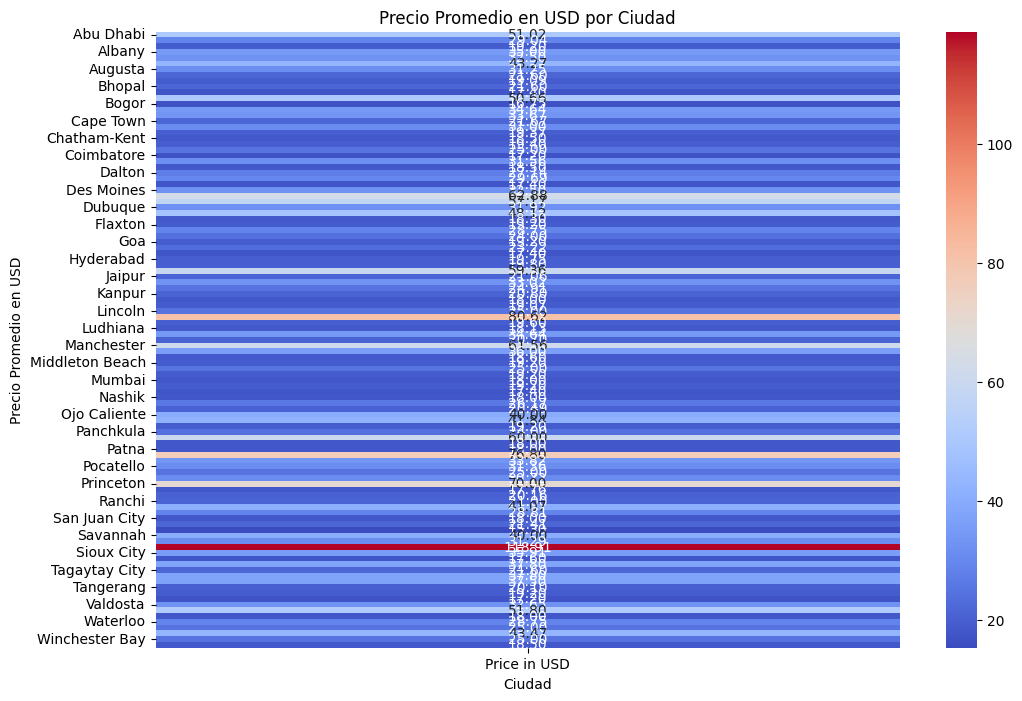

In [40]:
# Vamos a crear ahora un mapa de calor entre ciudades y precio en USD

# Agrupar por ciudad y calcular el precio promedio en USD
city_price_avg = df.groupby('City')['Price in USD'].mean().reset_index()

# Crear una tabla pivote para el mapa de calor
heatmap_data = city_price_avg.pivot_table(index='City', values='Price in USD')

# Crear el mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Precio Promedio en USD por Ciudad')
plt.xlabel('Ciudad')
plt.ylabel('Precio Promedio en USD')
plt.show()

Como es imposoible de entender, vamos a tomar las 20 ciudades con mejores restaurantes

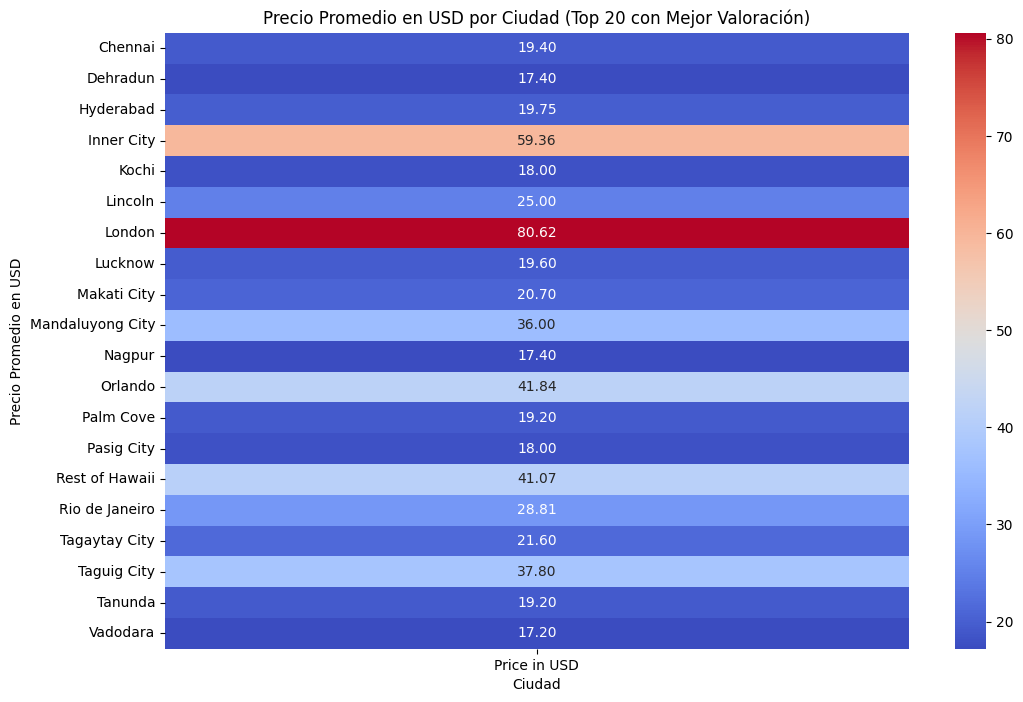

In [41]:
# Agrupamos por ciudad y calculamos la valoración promedio
city_rating_avg = df.groupby('City')['Aggregate rating'].mean().reset_index()

# Seleccionamos las 20 ciudades con mejor valoración promedio
top_20_cities = city_rating_avg.nlargest(20, 'Aggregate rating')

# Filtramos el DataFrame original para incluir solo las 20 ciudades seleccionadas
df_top_20 = df[df['City'].isin(top_20_cities['City'])]

# Agrupamos por ciudad y calculamos el precio promedio en USD
city_price_avg = df_top_20.groupby('City')['Price in USD'].mean().reset_index()

# Creamos una tabla pivote para el mapa de calor
heatmap_data = city_price_avg.pivot_table(index='City', values='Price in USD')

# Crear el mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Precio Promedio en USD por Ciudad (Top 20 con Mejor Valoración)')
plt.xlabel('Ciudad')
plt.ylabel('Precio Promedio en USD')
plt.show()


C:\Users\fptis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1400x800 with 0 Axes>

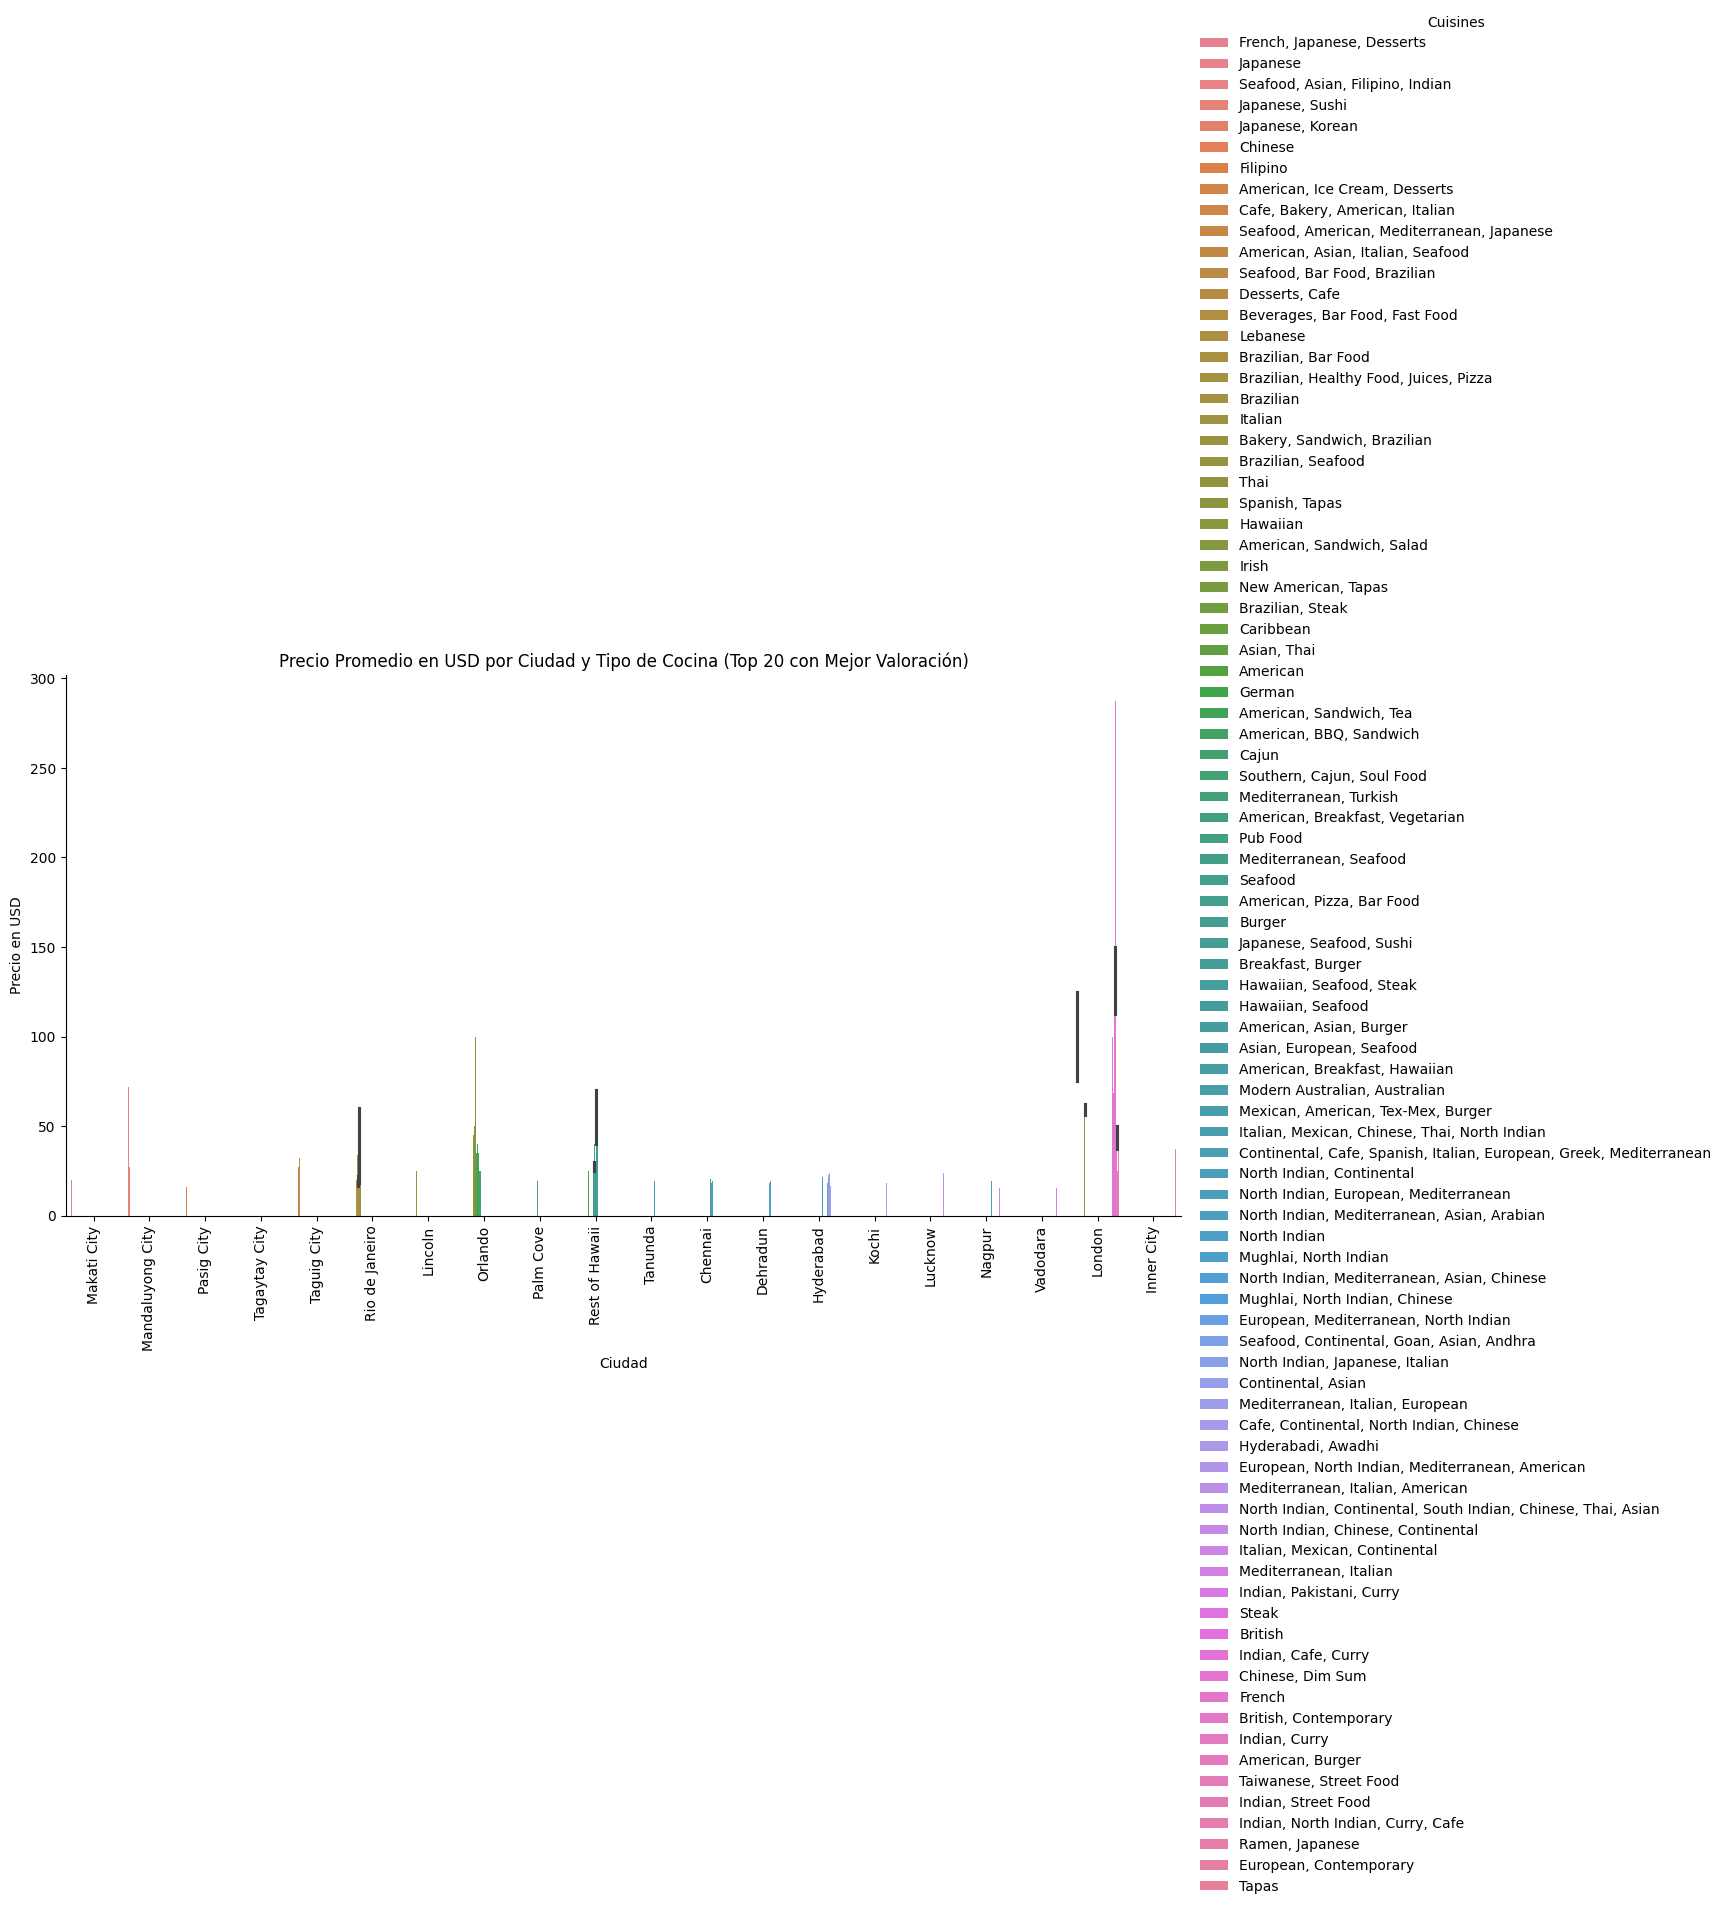

In [42]:
# Crear un catplot con hue
plt.figure(figsize=(14, 8))
sns.catplot(data=df_top_20, x='City', y='Price in USD', hue='Cuisines', kind='bar', height=6, aspect=2)
plt.xticks(rotation=90)
plt.title('Precio Promedio en USD por Ciudad y Tipo de Cocina (Top 20 con Mejor Valoración)')
plt.xlabel('Ciudad')
plt.ylabel('Precio en USD')
plt.show()

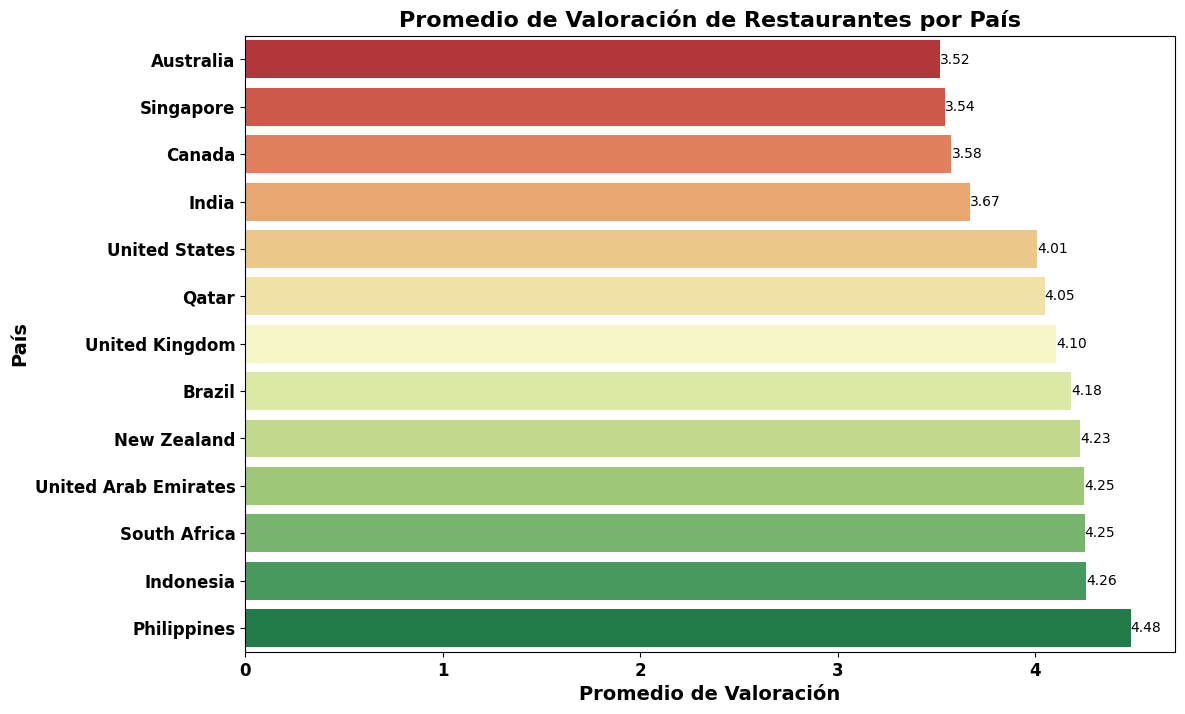

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un diccionario para mapear los códigos de país a nombres de países
country_dict = {
    1: 'India',
    14: 'Australia',
    30: 'Brazil',
    37: 'Canada',
    94: 'Indonesia',
    148: 'New Zealand',
    162: 'Philippines',
    166: 'Qatar',
    184: 'Singapore',
    189: 'South Africa',
    191: 'Sri Lanka',
    208: 'Turkey',
    214: 'United Arab Emirates',
    215: 'United Kingdom',
    216: 'United States'
}

# Agregar una columna de país al DataFrame
df['Country'] = df['Country Code'].map(country_dict)

# Agrupar por país y calcular el promedio de valoración
country_ratings = df.groupby('Country')['Aggregate rating'].mean().reset_index()

# Ordenar los países por promedio de valoración
country_ratings = country_ratings.sort_values(by='Aggregate rating', ascending=False)

# Crear una paleta de colores de rojo a verde (invertida)
palette = sns.color_palette("RdYlGn_r", len(country_ratings))

# Crear el gráfico de barras 
plt.figure(figsize=(12, 8))
sns.barplot(data=country_ratings, x='Aggregate rating', y='Country', hue='Country', dodge=False, palette=palette, legend=False)

# Añadir los valores en cada barra
for index, value in enumerate(country_ratings['Aggregate rating']):
    plt.text(value, index, f'{value:.2f}', va='center', ha='left', fontsize=10, color='black')

# Personalizar los ejes
plt.xlabel('Promedio de Valoración', fontsize=14, fontweight='bold')
plt.ylabel('País', fontsize=14, fontweight='bold')
plt.title('Promedio de Valoración de Restaurantes por País', fontsize=16, fontweight='bold')
plt.gca().invert_yaxis()  # Invertir el eje y para que el país con mayor valoración esté arriba
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

plt.show()

Habiendo hecho una limpieza de datos y algunos gráficos para entender el DATASET podemos ir viendo en qué ciudades están los mejores restaurantes, es decir con las mejores valoraciones y en qué rangos de precios. 
Como eran muchos países y ciudades, decidimos quedarnos con el top 20 y ahí empezar a trabajar.
Vemos que India tiene las peores valoraciones, mientras que Philipinas las mejores.
Hicimos lo mismo con las ciudades.
Y un gráfico interesante muestra que de las 20 mejores ciudades con mejores valoraciones, 12 se encuentran con un precio por debajo del promedio.
Esto nos puede dar un indicio de queno hace falta ser un restaurante caro para tener las mejores valoraciones. Aunque, la mejor valoración la tiene la ciudad Inner City, y tiene un precio que duplica al promedio.



##VAMOS CON LA PARTE DOS y TRES##

VUELVO A CARGAR EL DATAFRAME PORQUE TUVE ALGUNOS PROBLEMAS.

In [118]:
# Cargar el dataset con la codificación correcta
df = pd.read_csv('C:/GitHub/DataScienceI/Trabajo práctico Data Science I/zomato.csv', encoding='ISO-8859-1')

# Verificar las primeras filas para asegurar que los datos están presentes
print(df.head())
print(df['Aggregate rating'].value_counts(dropna=False))


   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

In [120]:
print(df_encoded.columns)


Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude',
       'Average Cost for two', 'Currency',
       ...
       'Cuisines_Turkish, Arabian, Middle Eastern',
       'Cuisines_Turkish, Arabian, Moroccan, Lebanese',
       'Cuisines_Turkish, Mediterranean, Middle Eastern',
       'Cuisines_Vietnamese', 'Cuisines_Vietnamese, Fish and Chips',
       'Cuisines_Western, Asian, Cafe', 'Cuisines_Western, Fusion, Fast Food',
       'Cuisines_World Cuisine', 'Cuisines_World Cuisine, Mexican, Italian',
       'Cuisines_World Cuisine, Patisserie, Cafe'],
      dtype='object', length=1985)


In [121]:
selected_columns = ['Price in USD', 'Votes', 'City_Faridabad', 'City_New Delhi', 'City_Noida', 
                    'Cuisines_Finger Food', 'Cuisines_Indian, Persian', 
                    'Cuisines_North Indian, Chinese, Continental, Mughlai', 
                    'Cuisines_North Indian, Mughlai, Chinese']

for column in selected_columns:
    if column not in df_encoded.columns:
        print(f"'{column}' no está en las columnas del DataFrame codificado.")


'Price in USD' no está en las columnas del DataFrame codificado.


In [133]:
# Supongamos que `exchange_rates` es un diccionario con las tasas de cambio
exchange_rates = {
    'Dollar($)': 1,
    'Pounds(£)': 1.39,  # Ajusta las tasas de cambio según sea necesario
    'Euros(€)': 1.18,
    'Indian Rupees(Rs.)': 0.013,
    'Brazilian Real(R$)': 0.18,
    'Indonesian Rupiah(IDR)': 0.000069,
    'Turkish Lira(TL)': 0.12,
    'Emirati Diram(AED)': 0.27,
    'Botswana Pula(P)': 0.091,
    'Sri Lankan Rupee(LKR)': 0.0051,
    'Qatari Rial(QR)': 0.27,
    'NewZealand($)': 0.71,
    'Rand(R)': 0.068
}

# Convertir los precios a USD
df['Price in USD'] = df.apply(lambda row: row['Average Cost for two'] * exchange_rates.get(row['Currency'], 1), axis=1)


In [134]:
print(df['Price in USD'].head())
print(df['Price in USD'].isnull().sum())


0    1100
1    1200
2    4000
3    1500
4    1500
Name: Price in USD, dtype: int64
0


In [135]:
# Codificar variables categóricas
df_encoded = pd.get_dummies(df, columns=['City', 'Cuisines'])

# Seleccionar las características y la variable objetivo
selected_columns = ['Price in USD', 'Votes', 'City_Faridabad', 'City_New Delhi', 'City_Noida', 
                    'Cuisines_Finger Food', 'Cuisines_Indian, Persian', 
                    'Cuisines_North Indian, Chinese, Continental, Mughlai', 
                    'Cuisines_North Indian, Mughlai, Chinese']

features = df_encoded[selected_columns]
target = df['Aggregate rating']

# Verificar que no hay valores NaN en las características seleccionadas
print(features.isnull().sum())
print(target.isnull().sum())


Price in USD                                            0
Votes                                                   0
City_Faridabad                                          0
City_New Delhi                                          0
City_Noida                                              0
Cuisines_Finger Food                                    0
Cuisines_Indian, Persian                                0
Cuisines_North Indian, Chinese, Continental, Mughlai    0
Cuisines_North Indian, Mughlai, Chinese                 0
dtype: int64
0


In [136]:
from sklearn.feature_selection import SelectKBest, f_regression

# Aplicar SelectKBest para seleccionar las mejores características
selector = SelectKBest(score_func=f_regression, k=10)
selector.fit(features, target)

# Obtener las puntuaciones de cada característica
scores = selector.scores_

# Obtener las características seleccionadas
selected_features = selector.get_support(indices=True)
selected_columns = features.columns[selected_features]

# Mostrar las características seleccionadas
for feature in selected_columns:
    print(feature)


Price in USD
Votes
City_Faridabad
City_New Delhi
City_Noida
Cuisines_Finger Food
Cuisines_Indian, Persian
Cuisines_North Indian, Chinese, Continental, Mughlai
Cuisines_North Indian, Mughlai, Chinese


C:\Users\fptis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=10 is greater than n_features=9. All the features will be returned.
  warnings.warn(


In [139]:
# Continuamos con el modelo de clasificación
#Transformar la Variable Objetivo en Categorías:
# Crear una columna de clasificación basada en Aggregate rating
df['rating_category'] = pd.cut(df['Aggregate rating'], bins=[0, 2, 4, 5], labels=['Baja', 'Media', 'Alta'], include_lowest=True)

# Seleccionar las características y la nueva variable objetivo
features = df_encoded[selected_columns]
target = df['rating_category']


In [140]:
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [141]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Inicializar el modelo de Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones
predictions = model.predict(X_test)

# Calcular y mostrar el reporte de clasificación
print(classification_report(y_test, predictions))

# Mostrar la matriz de confusión
print(confusion_matrix(y_test, predictions))


              precision    recall  f1-score   support

        Alta       0.52      0.43      0.48       230
        Baja       1.00      1.00      1.00       422
       Media       0.90      0.93      0.91      1259

    accuracy                           0.88      1911
   macro avg       0.81      0.79      0.80      1911
weighted avg       0.88      0.88      0.88      1911

[[ 100    0  130]
 [   0  421    1]
 [  91    0 1168]]


QUIERO VER UN EJEMPLO EN ACCIÓN.

In [142]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Supongamos que tu modelo entrenado es 'model'
# Datos del nuevo restaurante
nuevo_restaurante = {
    'Price in USD': [20],
    'Votes': [100],  
    'City_Faridabad': [0],
    'City_New Delhi': [1],
    'City_Noida': [0],
    'Cuisines_Finger Food': [0],
    'Cuisines_Indian, Persian': [0],
    'Cuisines_North Indian, Chinese, Continental, Mughlai': [1],
    'Cuisines_North Indian, Mughlai, Chinese': [0]
}

# Crear un DataFrame con los datos del nuevo restaurante
df_nuevo = pd.DataFrame(nuevo_restaurante)

# Hacer la predicción
prediccion = model.predict(df_nuevo)

# Mostrar el resultado
print(f"La calificación predicha para el nuevo restaurante es: {prediccion[0]}")


La calificación predicha para el nuevo restaurante es: Media


### Pasos Realizados ###
- EDA: Realizamos un análisis exploratorio de datos, visualizando la relación entre valoraciones, precios y otros factores. Eliminamos datos irrelevantes y normalizamos los precios a USD.

- Feature Selection: Usamos SelectKBest con f_regression para seleccionar las características más relevantes: Price in USD, Votes, City_, y Cuisines_.

- Modelo de Clasificación: Entrenamos un Random Forest Classifier con las características seleccionadas y categorizamos la calificación de los restaurantes en Baja, Media y Alta.

- Validación del Modelo: Calculamos las métricas de precisión, recall, f1-score y accuracy para evaluar el rendimiento del modelo, obteniendo un accuracy de 88%.

### Conclusiones ###
Basándonos en los resultados, identificamos que los votos y los precios son características clave. Recomendamos enfoques específicos para la ubicación y tipo de cocina, así como estrategias de precios y servicios.
